# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы

1. Изучение общей информации о данных

2. Предобработка данных:
 * определение и изучение пропущенных значений
   - заполнение пропусков
   - вынесение гипотезы о причинах, которые могли привести к пропускам в данных
 * приведение данных к нужным типам

3. Посчитать и добавить в таблицу:
 * цену квадратного метра
 * день недели, месяц и год публикации объявления
 * этаж квартиры; варианты — первый, последний, другой
 * соотношение жилой и общей площади, а также отношение площади кухни к общей

4. Проведение исследовательского анализа данных и выполнение инструкций
 * Изучение следующие параметры: площадь, цена, число комнат, высота потолков. Построение гистограммы для каждого параметра.
 * Изучение времени продажи квартиры. Построение гистограмму. Расчет среднего и медианы. Описание, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
 * Фильтрация редких и выбивающихся значений. Опишисание обнаруженных особенностей.
 * Изучение факторов, больше всего влияющих на стоимость квартиры. Изучение, зависимости ли цены от квадратного метра, числа комнат, удалённости от центра, от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучение зависимости от даты размещения: дня недели, месяца и года.
 * Выбор 10 населённых пунктов с наибольшим числом объявлений. Расчет средней цены квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
 * Изучение предложения квартир. Выделить квартиры в Санкт-Петербурге. Найти область, которая входит в центр. Создайть столбец с расстоянием до центра в километрах: округление до целых значений. Расчет средней цены для каждого километра. Построение графика зависимости цена от удаленности от центра. Определение центральной зоны по графику.
 * Выделение сегмента квартир в центре. Анализ этой территории и изучение параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияющих на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Ввыводы. Соотнесение с общими выводами по городу.
5. Общий вывод

#### Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd  #импортируем pandas

import matplotlib.pyplot as plt  # имортируем matplot

import numpy as np

In [2]:
realty_archive = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')  #открываем файл в читаемом виде
print('Первые 10 строк датафрейма:')
realty_archive.head(10)

Первые 10 строк датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
print('Общая информация о данных:')
print()
print(realty_archive.info())  #получаем общую информацию о данных

Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null objec

### Вывод

- Полученные данные содержат значения разных типов. Часть числовых данных является типом данных object, соответственно, для последующих вычислений потребуется их конвертация в числовой тип данных.
- В исходных данных имеется значительное число пропусков. В целом, данные пропущены в столбцах: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',  'ponds_nearest', 'days_exposition'

Появление пропусков может быть обусловлено разными причинами, например: в столбце is_apartment пропуски возможно появились из-за того, что при заполнении объявления люди оставляли прочерк в данной графе, либо не заполняли ее вообще, так как их квартира не является аппартаментами. Здерь будет логично заменить пропущенные значения на False.

Пропуски в количестве балконов можно объяснить по аналогии со столбцом аппартаментов. Здесь пропуски можно заменить на 0.

Пропуски в столбцах parks_around3000 и parks_nearest можно объяснить отсутсвием парков в радиусе 3 км от квартиры и отсутствием парков вообще соответственно. Можно предположить замену на 0.

Пропуски названий населенных пунктов скорее всего вызваны случайностью. Логичную замену предложить невозможно, и так как таких пропусков всего 49 - строки с таким значением населенного пункта можно удалить.

В целом, данные, заполняемые самим пользователем можно объяснить случайностью - пользователь решил не заполнять графу в связи с отсутствием в его квартире данного параметра (балкона, квартира - не аппартаменты и т.д.)

Значения, получаемые автоматически, могут быть пропущены вследствие неправильно настроенной замены отсутствия того или иного параметра на 0, либо в целом ошибкой при выгрузке данных (пример - данные об аэропорте).

### Шаг 2. Предобработка данных

Подсчитаем количество пропущенных значений в каждом столбце датафрейма.

In [4]:
print('Количество пропущенных значений в столбце')
for name in realty_archive.columns:   #построчно выводим количество пропущенных значений с целью последующего их устранения
    print('    {: <21}:'.format(name), realty_archive[name].isna().sum())

Количество пропущенных значений в столбце
    total_images         : 0
    last_price           : 0
    total_area           : 0
    first_day_exposition : 0
    rooms                : 0
    ceiling_height       : 9195
    floors_total         : 86
    living_area          : 1903
    floor                : 0
    is_apartment         : 20924
    studio               : 0
    open_plan            : 0
    kitchen_area         : 2278
    balcony              : 11519
    locality_name        : 49
    airports_nearest     : 5542
    cityCenters_nearest  : 5519
    parks_around3000     : 5518
    parks_nearest        : 15620
    ponds_around3000     : 5518
    ponds_nearest        : 14589
    days_exposition      : 3181


Так как для выполнения последующих задач понадобится учитывать населенный пункт, в котором находится квартира, а число пропущенных значений в столбце, в который записаны населенные пункты, незначительно (49) можно безболезненно удалить строки с незаполненными значениями населенного пункта.


In [5]:
realty_archive.dropna(subset=['locality_name'], inplace=True)  #удаляем пропуски

Также удалим строки с незаполненными значениями общего количества этажей, в столбце floors_total.

In [6]:
realty_archive.dropna(subset=['floors_total'], inplace=True)  #удаляем пропуски

Заполним пропуски в столбце is_apartment. Стоит предположить, что они появились вследствие того, что по какой-то причине для квартир, не являющихся апартаментами, соответствующий пункт не был выбран. Соответственно, меняем все пропущенные значения на значение False.

In [7]:
realty_archive['is_apartment'] = realty_archive['is_apartment'].fillna(False)  #заполняем пропуски значением False

Пропуски в столбце ceiling_height могли появиться из-за того, что люди не знали высоту потолков и просто не указали ее. Заполним пропущенные значения медианными для каждого населенного пункта.
Для начала получим медианные значения высоты потолков для каждого населенного пункта.

Для проведения расчета необходимо сменить тип данных в данном столбце. Так как в столбце ceiling_height расположены дробные числа, меняем тип данных на float.

In [8]:
realty_archive['ceiling_height'] = realty_archive['ceiling_height'].astype('float')  #меняем тип данных 
                                                                                     #в столбце ceiling_height

realty_archive['ceiling_height'].dtype  #проверяем замену

dtype('float64')

Находим медианные значения высоты потолков для каждого населенного пункта.

In [9]:
ceiling_median_by_locality = realty_archive.groupby('locality_name')['ceiling_height'].median()  # находим медианные
                                 # значения по населенным пунктам

def change_to_median(row):  # функция замены пустых значений в столбце высоты потолка на медианные
    temp_city_name = row['locality_name']
    temp_ceiling = row['ceiling_height']
    
    if temp_city_name in ceiling_median_by_locality.index:
        return ceiling_median_by_locality[temp_city_name]
    return temp_ceiling

Заменяем пустые значения высоты потолка на медианные.

In [10]:
realty_archive.loc[realty_archive['ceiling_height'].isnull(), 'ceiling_height'] = (  # заполняем пропуски в столбце
                   realty_archive.apply(change_to_median, axis=1)                    # высоты потолка
)

print('Количество пустых значений столбца "ceiling_height":', realty_archive['ceiling_height'].isna().sum())


Количество пустых значений столбца "ceiling_height": 120


Оставшиеся пропуски образовались из-за того, что для отдельных населенных пунктов данные высоты потолка всех квартир, находящихся в нем, не были заполнены.
Заполним такие пропуски медианным значением по всему датафрейму.

In [11]:
realty_archive['ceiling_height'].fillna(realty_archive['ceiling_height'].median(), inplace=True)  # оставшиеся пустые
                                                            # значения заполняем медианным значение по всему столбцу
realty_archive['ceiling_height'] = realty_archive['ceiling_height'].round(2)  # округляем для простоты восприятия 
                                                                              # до 2 знаков после запятой
print('Количество пустых значений столбца "ceiling_height":', realty_archive['ceiling_height'].isna().sum())

Количество пустых значений столбца "ceiling_height": 0


Заполним пропуски в столбце living_area. Рассчитаем долю жилой площади, найдя отношение указанной жилой площади к общей. Долей считаем среднее от полученных значений.

In [12]:
# меняем тип данных на float
realty_archive['living_area'] = realty_archive['living_area'].astype('float') 
realty_archive['total_area'] = realty_archive['total_area'].astype('float')

In [13]:
# функция для замены пропущенных значений столбца с площадью прогнозируемой площадью
    # data - датафрейм
    # row_to_fill - столбец для замены
    # total_row - столбец с общей площадью помощения
    
def change_area_nan_to_mean(data, row_to_fill, total_row):
    find_part = data[row_to_fill] / data[total_row]  # находим отношения жилых площадей к общим площадям квартир
    mean_part = find_part.dropna().reset_index(drop=True).mean()  # находим среднюю долю жилой площади всех квартир
    
    data.loc[data[row_to_fill].isna(), row_to_fill] = (
        (data.loc[data[row_to_fill].isna(), total_row] * mean_part).round(2)
    )

In [14]:
change_area_nan_to_mean(realty_archive, 'living_area', 'total_area')

print('Количество пустых значений столбца "living_area":', realty_archive['living_area'].isna().sum())

Количество пустых значений столбца "living_area": 0


Заполним пропуски в столбце kitchen_area аналогично предыдущему.

In [15]:
# меняем тип данных в столбще на float
realty_archive['kitchen_area'] = realty_archive['kitchen_area'].astype('float')

# заполняем пустые значения в столбце
change_area_nan_to_mean(realty_archive, 'kitchen_area', 'total_area')

print('Количество пустых значений столбца "kitchen_area":', realty_archive['kitchen_area'].isna().sum())

Количество пустых значений столбца "kitchen_area": 0


Пропущенные значения столбца 'balcony' можно объяснить тем, что в квартире его нет, поэтому данный пункт не был заполнен.

Исходя из этого, заменим пустые значения на 0. Предварительно заменим тип данных на целочисленный (integer), так как количество балконов не может быть не целым.

In [16]:
# переводим значения столбца в числовой формат
realty_archive['balcony'] = pd.to_numeric(realty_archive['balcony'], errors='coerce')

# заполняем пропуски значением 0
realty_archive['balcony'] = realty_archive['balcony'].fillna(0)

# меняем тип данных на целочисленный
realty_archive['balcony'] = realty_archive['balcony'].astype('int')

# проверяем замену типа данных
realty_archive['balcony'].dtype

dtype('int64')

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest скорее всего обусловлены ошибками автоматической выгрузке данных картографического сервиса. Так, к примеру, у поселка Янино, при нахождении его на расстоянии около 30 км от аэропорта Пулково, значение airports_nearest пропущено, тогда как у Молодежного, которое находится примерно в 89 км от Пулково, данное значение заполнено.

Исходя из этого, стоит составить баг-репорт, чтобы проверили выгрузку данных для отдельных населенных пунктов.

Для последующего анализа заменим пустые значения вышеупомянутых столбцов на число 777777, чтобы легко его фильтровать.

In [17]:
realty_archive.loc[:, ['airports_nearest', 
                       'cityCenters_nearest', 
                       'parks_nearest', 
                       'ponds_nearest']] = realty_archive.loc[:, ['airports_nearest',
                                                                  'cityCenters_nearest',
                                                                  'parks_nearest',
                                                                  'ponds_nearest']].fillna(777777)

В столбцах parks_around3000, ponds_around3000 пропуски можно объяснить отсутствием в радиусе 3 км от квартиры парков и водоемов соответственно. Поэтому, пустые значения этих столбцов можно заменить на 0. 

In [18]:
realty_archive.loc[:, ['parks_around3000',
                       'ponds_around3000']] = realty_archive.loc[:, ['parks_around3000',
                                                                     'ponds_around3000']].fillna(0)

Пропуски в столбце days_exposition из имеющихся данных никак не заполнить, поэтому на время анализа заполним их значением 777777

In [19]:
realty_archive['days_exposition'] = realty_archive['days_exposition'].fillna(777777)

#### Замена типов данных

Для проведения анализа необходимо заменить типы данных в столбцах:
* столбец last_price - привести к целочисленному типу данных (integer), так как цена указана без цифр копеек
* столбец first_day_exposition - к временному типу данных
* столбец floors_total - к типу данных integer - количество этажей - целое число
* airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - к целочисленному типу - расстояние указано с точностью до метра
* parks_around3000, ponds_around3000 - integer - количество - это целое число
* days_exposition - integer - указаны значения полных дней

In [20]:
# список столбцов для замены на тип данных integer
integer_list = ['last_price', 'floors_total', 'airports_nearest', 
                'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
                'ponds_around3000', 'ponds_nearest', 'days_exposition']    

# меняем тип данных в выбранных столбцах
for column_name in integer_list:
    realty_archive[column_name] = pd.to_numeric(realty_archive[column_name], errors='coerce')
    realty_archive[column_name] = realty_archive[column_name].astype('int')

# меняем тип данных в столбце first_day_exposition
realty_archive['first_day_exposition'] = pd.to_datetime(realty_archive['first_day_exposition'])

Проверяем замену типов данных и заполнения пропусков в датафрейме:

In [21]:
realty_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
cityCenters_nearest     23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000     

### Выводы
Удалены строки с незаполненными значениями населенного пункта и незаполненными значениями общего количества этажей, в столбце floors_total.

Заполнены пропуски в столбце is_apartment. Стоит предположить, что они появились вследствие того, что по какой-то причине для квартир, не являющихся апартаментами, соответствующий пункт не был выбран.

Пропуски в столбце ceiling_height могли появиться из-за того, что люди не знали высоту потолков и просто не указали ее. Заполнили пропущенные значения медианными для каждого населенного пункта.
Для проведения расчета необходимо сменить тип данных в данном столбце. Так как в столбце ceiling_height расположены дробные числа, заменили тип данных на float.

Заполнили пропуски в столбце living_area, рассчитав долю жилой площади.

Заполним пропуски в столбце kitchen_area аналогично предыдущему.

Пропущенные значения столбца 'balcony' можно объяснить тем, что в квартире его нет, поэтому данный пункт не был заполнен.
Исходя из этого, заменили пустые значения на 0. Предварительно заменили тип данных на целочисленный (integer), так как количество балконов не может быть не целым.

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest скорее всего обусловлены ошибками автоматической выгрузке данных картографического сервиса. Так, к примеру, у поселка Янино, при нахождении его на расстоянии около 30 км от аэропорта Пулково, значение airports_nearest пропущено, тогда как у Молодежного, которое находится примерно в 89 км от Пулково, данное значение заполнено.

Исходя из этого, стоит составить баг-репорт, чтобы проверили выгрузку данных для отдельных населенных пунктов.

Для последующего анализа заменили пустые значения вышеупомянутых столбцов на число 777777, чтобы легко его фильтровать.

В столбцах parks_around3000, ponds_around3000 пропуски можно объяснить отсутствием в радиусе 3 км от квартиры парков и водоемов соответственно. Поэтому, пустые значения этих столбцов заменили на 0.

Пропуски в столбце days_exposition из имеющихся данных никак не заполнить, поэтому на время анализа заполнили их значением 777777

Заменены типы данных в столбцах:

- столбец last_price - привести к целочисленному типу данных (integer), так как цена указана без цифр копеек
- столбец first_day_exposition - к временному типу данных
- столбец floors_total - к типу данных integer - количество этажей - целое число
- airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - к целочисленному типу - расстояние указано с точностью до метра
- parks_around3000, ponds_around3000 - integer - количество - это целое число
- days_exposition - integer - указаны значения полных дней

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим столбец ratio_living_total с соотношением жилой и общей площади.

In [22]:
# добавляем новый столбец, для удобства округляем до 2-х знаков после запятой
realty_archive['ratio_living_total'] = (realty_archive['living_area'] / realty_archive['total_area']).round(2)

print('Первые 5 строк полученного столбца', realty_archive['ratio_living_total'].name)
print(realty_archive['ratio_living_total'].head())

Первые 5 строк полученного столбца ratio_living_total
0    0.47
1    0.46
2    0.61
3    0.56
4    0.32
Name: ratio_living_total, dtype: float64


Добавим столбец ratio_kitchen_total с соотношением площади кухни и общей площади.

In [23]:
realty_archive['ratio_kitchen_total'] = (realty_archive['kitchen_area'] / realty_archive['total_area']).round(2)

print('Первые 5 строк полученного столбца', realty_archive['ratio_kitchen_total'].name)
print(realty_archive['ratio_kitchen_total'].head())

Первые 5 строк полученного столбца ratio_kitchen_total
0    0.23
1    0.27
2    0.15
3    0.19
4    0.41
Name: ratio_kitchen_total, dtype: float64


Добавим столбец price_per_sqr_meter с ценой квадратного метра

In [24]:
realty_archive['price_per_sqr_meter'] = (
    (realty_archive['last_price'] / realty_archive['total_area'])
    .round(0)
    .astype('int')
)

print('Первые 5 строк полученного столбца', realty_archive['price_per_sqr_meter'].name)
print(realty_archive['price_per_sqr_meter'].head())

Первые 5 строк полученного столбца price_per_sqr_meter
0    120370
1     82921
2     92786
3    408176
4    100000
Name: price_per_sqr_meter, dtype: int64


Добавим столбцы day, month, year - день недели, месяц и год публикации объявления соответственно

In [25]:
# добавляем столбец со значениями дня (числовым). 0 - понедельник, 6 - воскресенье
realty_archive['day'] = realty_archive['first_day_exposition'].dt.weekday

# добавляем столбец со значениями месяца
realty_archive['month'] = realty_archive['first_day_exposition'].dt.month

# добавляем столбец со значениями года
realty_archive['year'] = realty_archive['first_day_exposition'].dt.year

Добавим столбец floor_name с этажом (первый, последний, другой)

In [26]:
# функция именования этажа - первый, последний, другой
def name_floor(row):
    checked_floor = row['floor']
    total_floor = row['floors_total']
    
    if checked_floor == 1:
        return 'первый'
    elif checked_floor == total_floor:
        return 'последний'
    return 'другой'

# добавляем новый столбец с названиями этажей
realty_archive['floor_name'] = realty_archive.apply(name_floor, axis=1)

# выводим на экран
print('Первые 5 строк полученного столбца', realty_archive['floor_name'].name)
print(realty_archive['floor_name'].head())

Первые 5 строк полученного столбца floor_name
0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_name, dtype: object


Полученный датафрейм после всех изменений:

In [27]:
realty_archive.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total,ratio_kitchen_total,price_per_sqr_meter,day,month,year,floor_name
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,777777,0.47,0.23,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,0,777777,81,0.46,0.27,82921,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,2,574,558,0.61,0.15,92786,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.70,14,89.83,9,False,...,3,234,424,0.56,0.19,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,0.32,0.41,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,0,777777,55,0.47,0.30,95066,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,0,777777,155,0.28,0.39,99196,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.70,24,40.45,22,False,...,0,777777,777777,0.56,0.26,110545,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,777777,189,0.47,0.27,87455,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,777777,289,0.71,0.11,88525,6,2,2017,другой


### Выводы
Добавили столбец ratio_living_total с соотношением жилой и общей площади.

Добавили столбец ratio_kitchen_total с соотношением площади кухни и общей площади.

Добавили столбец price_per_sqr_meter с ценой квадратного метра

Добавили столбцы day, month, year - день недели, месяц и год публикации объявления соответственно

Добавили столбец floor_name с этажом (первый, последний, другой)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим параметры площади, цены, числа комнат и высоты потолков.

In [28]:
# получаем таблицу с описанием, также для последующего анализа включим столбец days_exposition
describe_of_chosen_columns = realty_archive.loc[:, ['total_area', 
                                                    'last_price', 
                                                    'rooms', 
                                                    'ceiling_height',
                                                    'days_exposition']].describe().round(2)

# меняем тип данных столбца с ценой на целочисленный для удобства восприятия
describe_of_chosen_columns['last_price'] = describe_of_chosen_columns['last_price'].astype('int')

# выводим полученную таблицу на экран
describe_of_chosen_columns

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23565.00,23565,23565.00,23565.00,23565.00
mean,60.32,6540058,2.07,2.73,104817.18
std,35.66,10910934,1.08,1.01,265366.07
min,12.00,12190,0.00,1.00,1.00
25%,40.00,3400000,1.00,2.55,45.00
50%,52.00,4646000,2.00,2.70,124.00
75%,69.70,6790000,3.00,2.70,390.00
max,900.00,763000000,19.00,100.00,777777.00


Очистим данные от выбросов

In [29]:
# функция создания столбца со значениями True - для нормальных значений / False - для выбросов
    # values - значение столбца
    # low - нижняя граница
    # high - верхняя граница

def good_data_true_false(value, low, high):
    if low <= value <= high:
        return True
    return False

In [30]:
# делим цену на 1000 для удобства отображения
realty_archive['last_price_in_k'] = (realty_archive['last_price'] / 1000).astype('int')

In [31]:
# функция отрисовки диаграммы размаха
    # data - датафрейм
    # column - столбец с данными для изучения
    # ylim_min - нижнее значение, до которого идут выбросы
    # ylim_max - верхнее значение, после которого идут выбросы

def draw_boxplot_lim(data, column, ylim_min, ylim_max):
    
    plt.ylim(ylim_min, ylim_max)
    data.boxplot(column, grid=True)
    
    return ylim_min, ylim_max

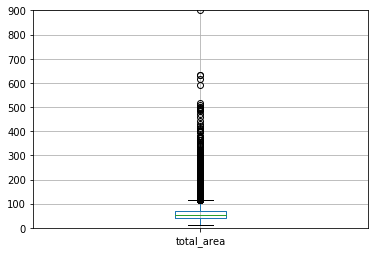

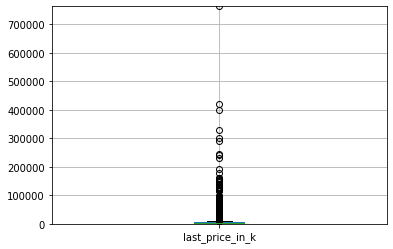

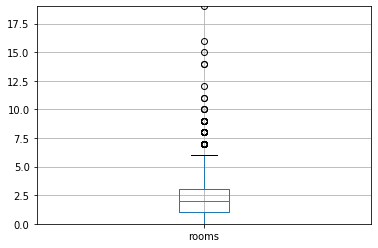

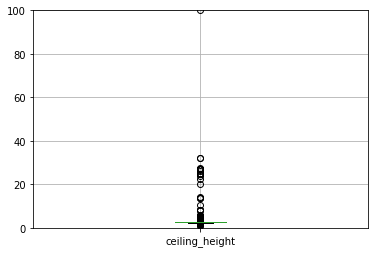

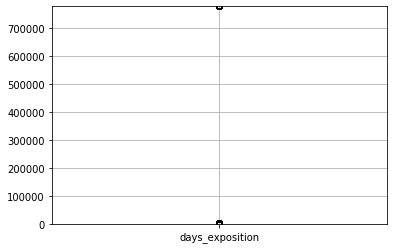

In [32]:
# список названий исследуемых столбцов
searching_columns = ['total_area', 'last_price_in_k', 'rooms', 'ceiling_height', 'days_exposition']

# строим диаграммы размаха для выбранных столбцов searching_columns
for name in searching_columns:
    draw_boxplot_lim(realty_archive, name, 0, realty_archive[name].max())
    plt.show()

In [33]:
# формируем датафрейм с описанием границ минимума и максимума для каждого столбца
y_limits = {'min': [12, 500, 1, 2.35, 0],
            'max': [120, 12500, 6, 2.9, 900]}
                    
min_max_limits = pd.DataFrame(data=y_limits, index=searching_columns)

print('Минимум и максимум для рассматриваемых столбцов:')
min_max_limits

Минимум и максимум для рассматриваемых столбцов:


,min,max
total_area,12.00,120.0
last_price_in_k,500.00,12500.0
rooms,1.00,6.0
ceiling_height,2.35,2.9
days_exposition,0.00,900.0


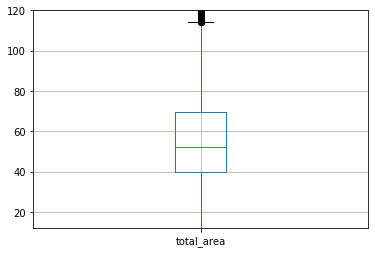

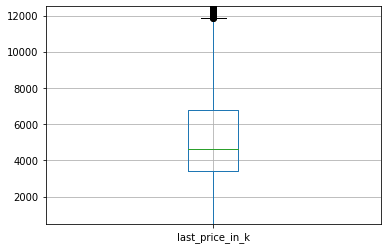

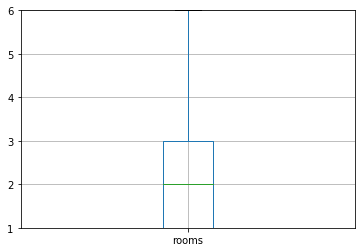

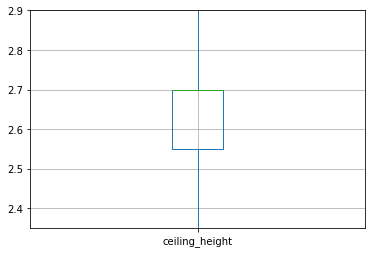

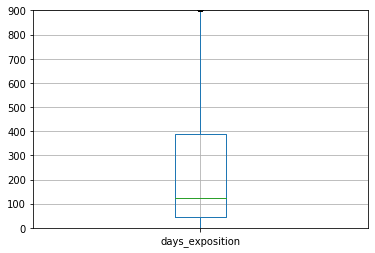

In [34]:
# строим диаграммы без выбросов и формируем столбцы good_data_true_false
# для последующей фильтрации выбросов

for name in searching_columns:
    draw_boxplot_lim(realty_archive, 
                     name, 
                     min_max_limits['min'][name], 
                     min_max_limits['max'][name])
    plt.show()
    
    realty_archive['good_' + name] = (
        realty_archive[name].apply(good_data_true_false, 
                                   args=(min_max_limits['min'][name], 
                                         min_max_limits['max'][name]))
    )

In [35]:
# устраняем выбросы, получаем чистый срез для последующего анализа
realty_archive_clear = realty_archive.query(
    'good_total_area and good_last_price_in_k and good_rooms and good_ceiling_height and good_days_exposition == True')
realty_archive_clear

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,day,month,year,floor_name,last_price_in_k,good_total_area,good_last_price_in_k,good_rooms,good_ceiling_height,good_days_exposition
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,1,12,2018,первый,3350,True,True,True,True,True
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,3,8,2015,другой,5196,True,True,True,True,True
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,0,9,2018,другой,2890,True,True,True,True,True
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,3,11,2017,другой,3700,True,True,True,True,True
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,2,5,2018,другой,2900,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.00,2,False,...,3,7,2018,другой,5500,True,True,True,True,True
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,3,10,2016,другой,9470,True,True,True,True,True
23692,2,1350000,30.00,2017-07-07,1,2.60,5,17.50,4,False,...,4,7,2017,другой,1350,True,True,True,True,True
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,4,8,2016,другой,4600,True,True,True,True,True


Данные очищены от выбросов.

In [36]:
# функция отрисовки гистограмм
    # data - датафрейм
    # column - столбец с данными для изучения
    # title - название графика
    # xlim - пределы по оси X
    # bins - количество корзин

def draw_hist(data, column, title, bins):
    data[column].plot(kind='hist',
                      title=title,
                      bins=bins,
                      xlim=(0, (data[column].max() + 1)),
                      grid=True,
                      legend=True)
    plt.show()

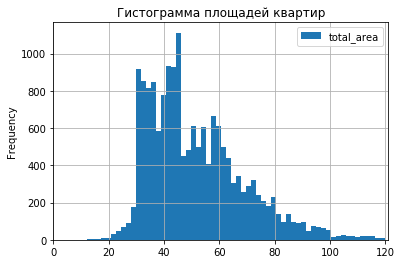

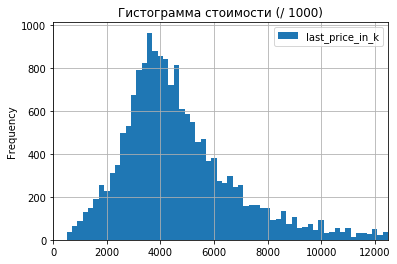

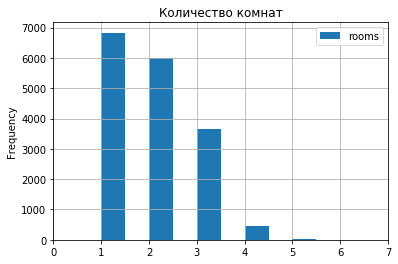

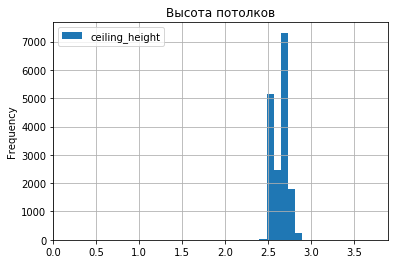

In [37]:
# Гистограмма площадей квартир    
draw_hist(realty_archive_clear, 'total_area', 'Гистограмма площадей квартир', 60)

# Гистограмма стоимости
draw_hist(realty_archive_clear, 'last_price_in_k', 'Гистограмма стоимости (/ 1000)', 60)

# Количество комнат
draw_hist(realty_archive_clear, 'rooms', 'Количество комнат', 10)

# Высота потолков
draw_hist(realty_archive_clear, 'ceiling_height', 'Высота потолков', 6)

По полученным данным следует, что наибольшая площадь квартиры состпвляет 900 кв. м., стоимость - 763000000 руб., число комнат - 19, высота потолков - 100 м. Очевидно, что такие згачения - выбросы.

Минимальные значения составляют - 12 кв. м для площади квартиры, 12190 руб. - стоимость, 0 - число комнат, 1 м - высота потолков. Здесь высота потолков также аномальна.

Данные были очищены от выбросов, был сформирован срез с "чистыми данными". По этим данным были построены гистограммы.

Исходя из гистограмм - наиболее часто вречающиеся площади квартир находятся в диапазонах 30-38 и 40-45 кв.м. Упоминания квартир с площадью выше 100 кв.м. и ниже 28 кв.м. единичны.

Количество квартир после 10 млн стремится к нулю. Пик квартир приходится на диапазон от 3,7 млн.

Наибольшее количество квартир - 1- и 2-х комнатные, при этом однокомнатных наибольшее количество, затем 3-х комнатных, меньше двушкомнатных. Количество квартир от 4-х комнат и более заметно снижается, по сранению с другими. Квартиры, с количеством комнат больше 5 - редкость.

Пик высоты потолков приходится на 2,75 м. Примерно на треть меньше квартир с потолком 2,5 м.

#### Изучим время продажи квартиры

In [38]:
# получаем описание столбца days_exposition
realty_archive_clear['days_exposition'].describe()

count    17006.000000
mean       154.284194
std        171.393650
min          1.000000
25%         42.000000
50%         88.000000
75%        203.000000
max        900.000000
Name: days_exposition, dtype: float64

Минимальное время продажи квартиры составляет 1 день, максимальное - 900 дней

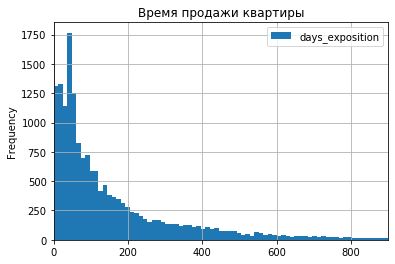

In [39]:
draw_hist(realty_archive_clear, 
          'days_exposition', 
          'Время продажи квартиры', 
          75)

In [40]:
print('Среднее время продажи квартиры: {:.2f}'.format(
    realty_archive_clear['days_exposition'].mean())
     )
print('Медиана времени продажи квартиры: {:.2f}'.format(
    realty_archive_clear['days_exposition'].median())
     )

Среднее время продажи квартиры: 154.28
Медиана времени продажи квартиры: 88.00


Исходя из полученной гистограммы, сделку можно считать долгой (в пределах нормы), если квартира продается дольше __300__ дней.

Сделки, состоявшиеся в первые __3__ дня, можно считать быстрыми.

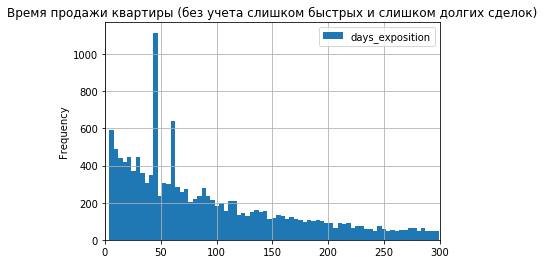

In [41]:
draw_hist(realty_archive_clear[(realty_archive_clear['days_exposition'] < 300) &
                              (realty_archive_clear['days_exposition'] > 3)],
          'days_exposition', 
          'Время продажи квартиры (без учета слишком быстрых и слишком долгих сделок)', 
          75)

После 3-х дней продажи квартиры снижаются, однако отмечаются всплески продаж. Пик приходится примерно на 45 день продаж, затем продажипадают. Пик меньше находится примерно к концу второго месяца продаж, затем активность падает, с небольшими пиками примерно каждые 30 дней.

#### Изучим зависимость цены квартиры от разных факторов

In [42]:
# функция отрисовки диаграммы разброса
    # data - датафрейм
    # column_x - столбец оси X
    # column_y - столбец оси Y
    # xlim - пределы по оси X
    # ylim - пределы по оси Y
    # title - название графика

def draw_scatter(data, column_x, column_y, xlim, ylim, title):
    data.plot(x=column_x,
              y=column_y,
              kind='scatter',
              xlim=xlim,
              ylim=ylim,
              alpha=0.03,
              title=title)
    plt.show()

In [43]:
# функция отрисовки зависимости цены квартиры от этажа
    # data - датасет

def make_first_last_hist(data):
    # отфильтровываем "другой"
    first_last = (
    data.where(data['floor_name'] != 'другой')
)
    # рисуем гистограммы, в зависимости от этажа назначаем число корзин
    for name, group_data in first_last.groupby('floor_name'):
        if name == 'первый':
            bins_number = 30
        else:
            bins_number = 50
        
        draw_hist(group_data, 'last_price_in_k',
                  'Зависимость цены квартиры от этажа: ' + name + ' этаж', 
                  bins_number)

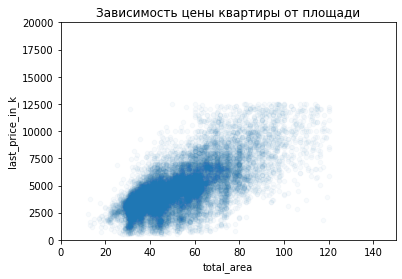

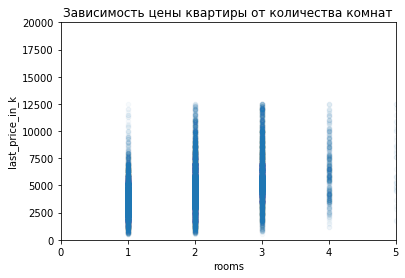

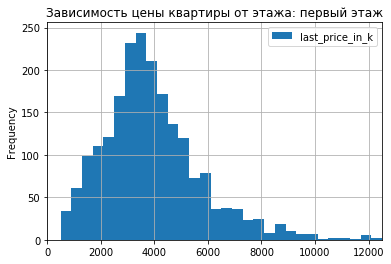

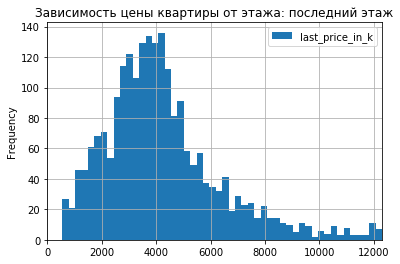

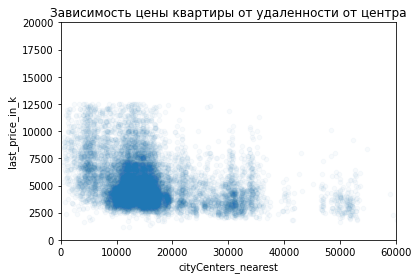

In [44]:
#Зависимость цены квартиры от площади
draw_scatter(realty_archive_clear, 'total_area', 'last_price_in_k', (0, 150), (0, 20000), 
             'Зависимость цены квартиры от площади')

# Зависимость цены квартиры от количества комнат
draw_scatter(realty_archive_clear, 'rooms', 'last_price_in_k', (0, 5), (0, 20000), 
             'Зависимость цены квартиры от количества комнат')

# Зависимость цены квартиры от этажа
make_first_last_hist(realty_archive_clear) 

# Зависимость цены квартиры от удаленности от центра
draw_scatter(realty_archive_clear, 'cityCenters_nearest', 'last_price_in_k', (0, 60000), (0, 20000), 
             'Зависимость цены квартиры от удаленности от центра')

Зависимость цены квартиры от площади, количества комнат и удаленности от центра:

In [45]:
realty_archive_clear[['last_price_in_k', 'total_area', 'rooms', 'cityCenters_nearest']].corr().head(1)

,last_price_in_k,total_area,rooms,cityCenters_nearest
last_price_in_k,1.0,0.700848,0.427,-0.466169


Цена квартиры зависит от __площади квартиры__ - чем больше площадь - тем выше стоимость. Имеются некоторые аномалии в виде высокой стоимости квартиры с маленькой площадью, но в целом тренд прослеживается.

Также, чем больше __комнат__, тем выше цена квартиры. Можно отметить, что четко видны границы изменения стоимости в зависимости от количества комнат.

Расположение квартиры на __первом или последнем этаже__ практически не влияет на стоимость. Судя по графикам, она примерно одинакова.

Больше всего квартир продаются в пределах 10-20 км от __центра города__, при этом, стоимость в этом отрезке примерно равнораспределена. Прослеживается тренд - чем ближе к центру (в пределах 10 км) - тем квартира дороже. Стоит отметить, что зависимость не такая явная, возможно, влияет более плохое состояние квартир в центре.

In [46]:
# функция отрисовки зависимостей по дате
def draw_dmy(data):

    # список день, месяц, год для автоматизации отрисовки
    dmy_list = ['day', 'month', 'year']

    # отрисовываем графики
    for name in dmy_list:
        if name == 'day':
            title_name = 'дня недели'
        elif name == 'month':
            title_name = 'месяца'
        else:
            title_name = 'года'
        
        draw_scatter(data, name, 'last_price_in_k', 
                 (data[name].min(), data[name].max()), 
                 (0, (data['last_price_in_k'].max()+1)),
                 'Зависимость цены квартиры от ' + title_name)    

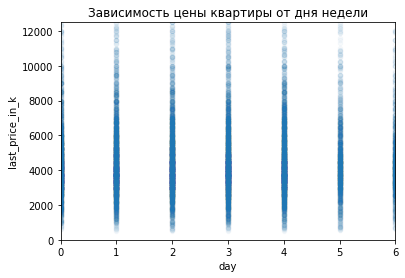

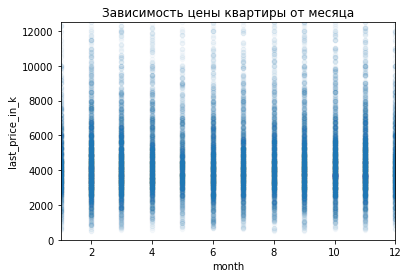

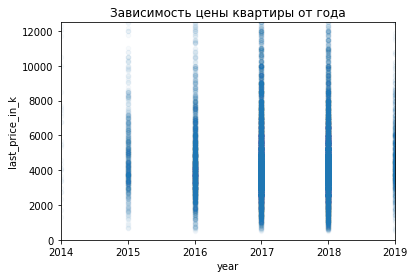

In [47]:
draw_dmy(realty_archive_clear)

Зависимость цены квартиры от дня, месяца и года:

In [48]:
realty_archive_clear[['last_price_in_k', 'day', 'month', 'year']].corr().head(1)

,last_price_in_k,day,month,year
last_price_in_k,1.0,-0.003095,0.013904,-0.008381


Стоимость квартиры не зависит ни от __дня__, ни от __месяца__ размещения объявления. Стоит отметить, что наблюдается рост стоимости квартир с 2015 до 2018 годов. В 2014 году объявлений о продаже квартир мало, скорее всего повлиял кризис. С 2015 года количество объявлений растет, растет и стоимость квартир. К 2019 году стоимость заметно снизилась, по сравнению с 2018 годом.

#### Средняя стоимость квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.

In [49]:
# формируем словарь из топ-10 населенных пунктов по количеству объявлений
top_ten_dict = (
    realty_archive_clear.groupby('locality_name')
                  .count()
                  .sort_values('total_images', 
                               ascending=False)
                  .head(10)
)

# считаем среднюю стоимость квадратного метра в топ 10 населенных пунктах
top_ten = (
    realty_archive_clear.query('locality_name in @top_ten_dict.index')
                  .pivot_table(index='locality_name',
                               values='price_per_sqr_meter',
                               aggfunc='mean')
                  .round(2)                                        # округляем до 2 знаков после запятой
                  .sort_values('price_per_sqr_meter',              # сортируем по убыванию
                               ascending=False)
)
top_ten

,price_per_sqr_meter
locality_name,
Санкт-Петербург,103852.05
Пушкин,99517.64
деревня Кудрово,92295.63
посёлок Парголово,89749.59
посёлок Мурино,85309.08
посёлок Шушары,77437.25
Колпино,74650.77
Гатчина,68051.91
Всеволожск,66771.69


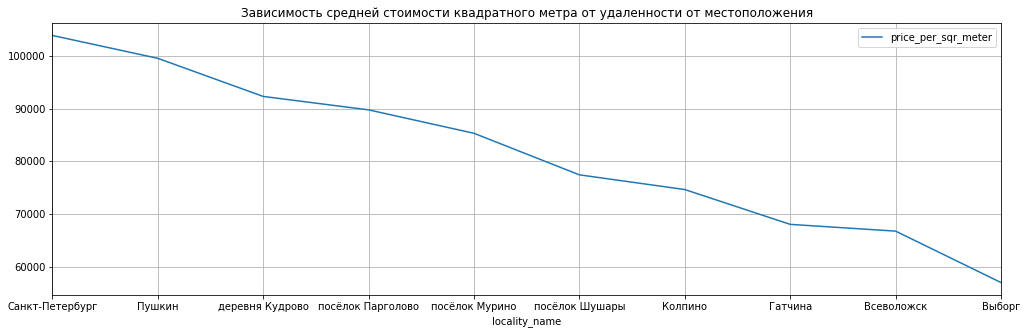

In [50]:
top_ten.plot(grid=True, 
             title='Зависимость средней стоимости квадратного метра от удаленности от местоположения', 
             figsize=(17, 5))
plt.show()

#### Выделим квартиры в Санкт-Петербурге:

In [51]:
# выделим квартиры в Санкт-Петербурге
realty_in_petersburg = realty_archive_clear.query('locality_name == "Санкт-Петербург"')
realty_in_petersburg.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,day,month,year,floor_name,last_price_in_k,good_total_area,good_last_price_in_k,good_rooms,good_ceiling_height,good_days_exposition
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,3,8,2015,другой,5196,True,True,True,True,True
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,6,2,2017,другой,5400,True,True,True,True,True
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,3,11,2017,другой,5050,True,True,True,True,True
15,16,4650000,39.0,2017-11-18,1,2.70,14,20.5,5,False,...,5,11,2017,другой,4650,True,True,True,True,True
17,6,4180000,36.0,2016-09-09,1,2.70,17,16.5,7,False,...,4,9,2016,другой,4180,True,True,True,True,True


Создадим новый столбец city_center_km с расстояние до центра в километрах:

In [52]:
realty_in_petersburg['city_center_km'] = (
    (realty_in_petersburg['cityCenters_nearest'] / 1000).astype('int')
)
realty_in_petersburg = realty_in_petersburg.query('city_center_km != 777')
realty_in_petersburg.head()

/Users/antonkirillov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,month,year,floor_name,last_price_in_k,good_total_area,good_last_price_in_k,good_rooms,good_ceiling_height,good_days_exposition,city_center_km
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,8,2015,другой,5196,True,True,True,True,True,13
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,2,2017,другой,5400,True,True,True,True,True,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,11,2017,другой,5050,True,True,True,True,True,13
15,16,4650000,39.0,2017-11-18,1,2.70,14,20.5,5,False,...,11,2017,другой,4650,True,True,True,True,True,14
17,6,4180000,36.0,2016-09-09,1,2.70,17,16.5,7,False,...,9,2016,другой,4180,True,True,True,True,True,14


 Для каждого километра считаем среднюю стоимость:

In [53]:
mean_money_per_km = (
    realty_in_petersburg.sort_values('city_center_km')
    .pivot_table(index='city_center_km',
                 values='last_price',
                 aggfunc='mean')
)
mean_money_per_km['last_price'] = mean_money_per_km['last_price'].astype('int')

Построим график зависимости цены от удаленности от центра

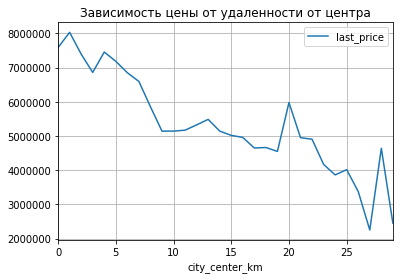

In [54]:
mean_money_per_km.plot(grid=True, title='Зависимость цены от удаленности от центра')
plt.show()

После пика на 5 км, график резко падает. Центральную зону принимаем равной __5 км__.

#### Выделим сегмент квартир в центре Петербурга

In [55]:
realty_in_petersburg_center = realty_in_petersburg.query('city_center_km <= 5')
realty_in_petersburg_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,month,year,floor_name,last_price_in_k,good_total_area,good_last_price_in_k,good_rooms,good_ceiling_height,good_days_exposition,city_center_km
24,8,6500000,97.2,2015-10-31,2,2.7,3,46.5,1,False,...,10,2015,первый,6500,True,True,True,True,True,2
61,18,7990000,74.0,2017-08-24,2,2.7,4,43.0,4,False,...,8,2017,последний,7990,True,True,True,True,True,4
99,32,9600000,90.0,2017-09-26,4,2.7,5,67.0,2,False,...,9,2017,другой,9600,True,True,True,True,True,2
138,8,4800000,40.0,2017-11-18,2,2.7,3,29.0,2,False,...,11,2017,другой,4800,True,True,True,True,True,2
219,12,7700000,58.7,2017-12-12,1,2.7,7,17.0,3,False,...,12,2017,другой,7700,True,True,True,True,True,4


Получим описание столбцов total_area, last_price, rooms, ceiling_height

In [56]:
describe_of_chosen_columns_petersburg = (
    realty_in_petersburg_center.loc[:, ['total_area',
                                        'last_price',
                                        'rooms',
                                        'ceiling_height']].describe().round(2)
)

# меняем тип данных столбца с ценой на целочисленный для удобства восприятия
describe_of_chosen_columns_petersburg['last_price'] = (
    describe_of_chosen_columns_petersburg['last_price'].astype('int')
)

# выводим полученную таблицу на экран
describe_of_chosen_columns_petersburg

,total_area,last_price,rooms,ceiling_height
count,932.00,932,932.00,932.00
mean,63.95,7307363,2.24,2.71
std,21.77,2257377,0.97,0.07
min,12.00,1686000,1.00,2.40
25%,46.00,5597500,1.00,2.70
50%,61.50,7088291,2.00,2.70
75%,80.00,8900000,3.00,2.70
max,120.00,12500000,6.00,2.90


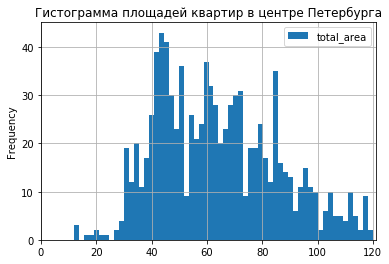

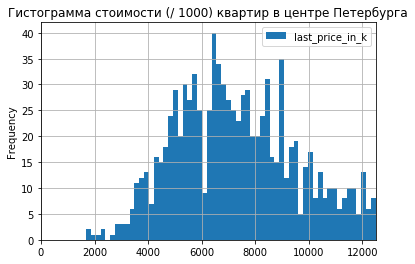

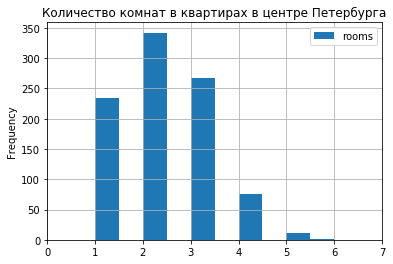

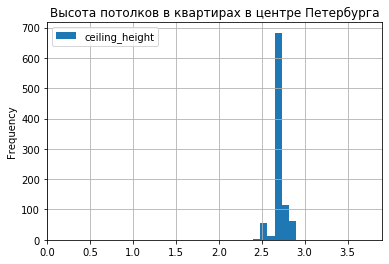

In [57]:
# Гистограмма площадей квартир
draw_hist(realty_in_petersburg_center, 
          'total_area', 
          'Гистограмма площадей квартир в центре Петербурга',
          60)

# Гистограмма стоимости (/ 1000) - делим значение цены на 1000, для нормального отображения
draw_hist(realty_in_petersburg_center, 
          'last_price_in_k', 
          'Гистограмма стоимости (/ 1000) квартир в центре Петербурга',
          60)

# Количество комнат
draw_hist(realty_in_petersburg_center, 
          'rooms', 
          'Количество комнат в квартирах в центре Петербурга',
          10)

# Высота потолков
draw_hist(realty_in_petersburg_center, 
          'ceiling_height', 
          'Высота потолков в квартирах в центре Петербурга',
          6)

В центре Петербурга преобладают квартиры площадью от 40 до 50 кв.м., имеются пики на 60 кв.м и примерно равный ему на 84 кв.м, в отличие от данных всего датафрейма, где чаще всего встречаются квартиры с площадью 30-45 кв.м
Стоимость квартир чаще находится в диапазоне 5 до 7 млн. руб., тогда как в целом по всем квартирам - большинство продается по цене 3,7 млн.
Чаще всего продают 2-х и 3-х комнатные квартиры. По всему датафрейму - 1 и 2-х комнатные.
Высота потолков в целом не отличается от данных по всему датафрейму, отсутствует пик на 2,5 м.

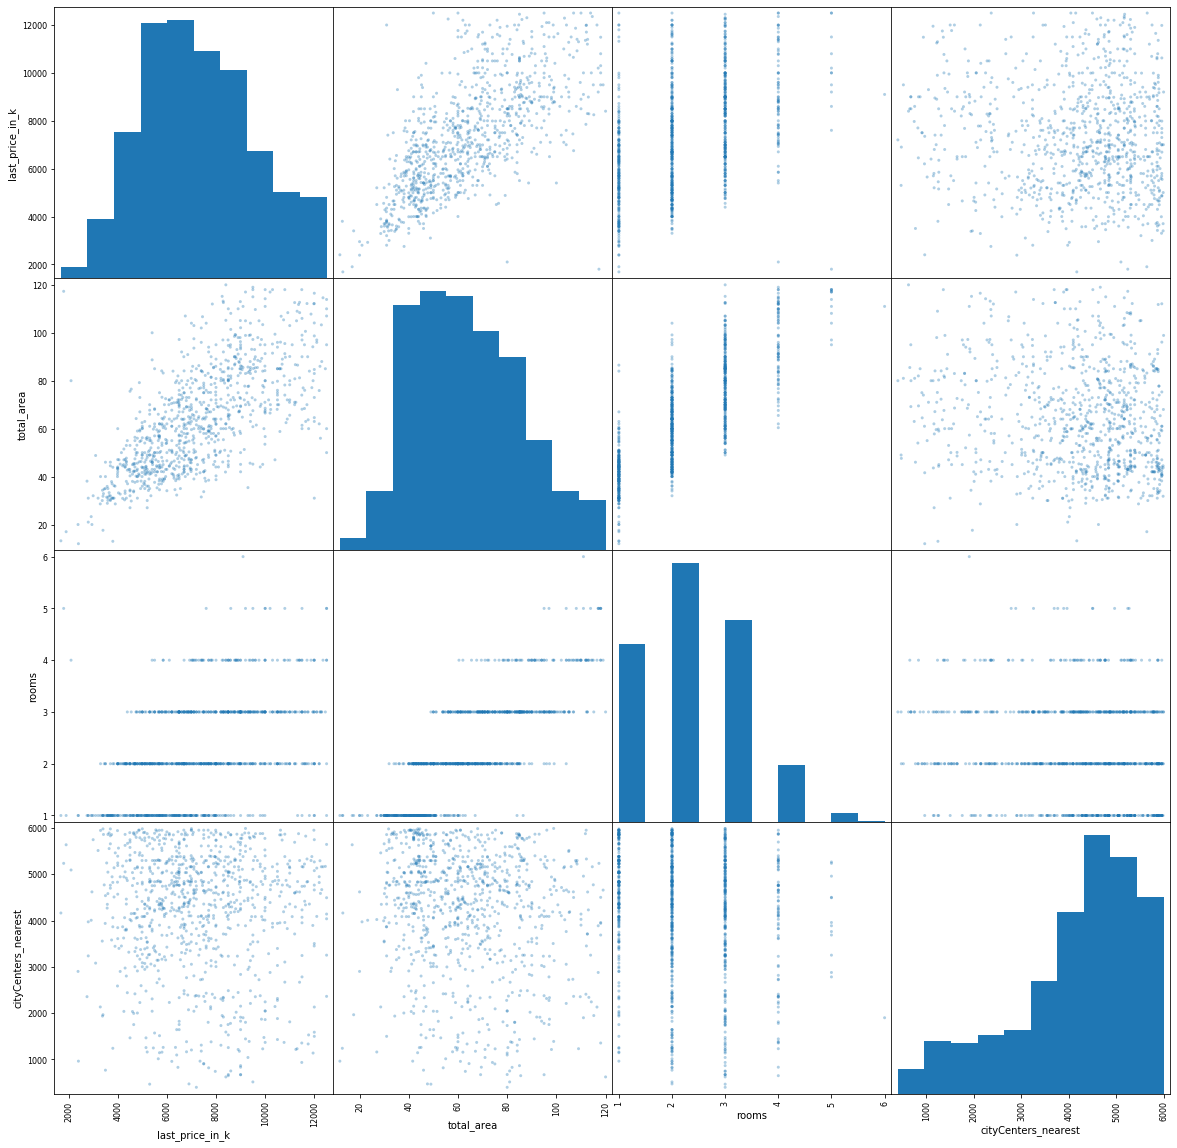

In [58]:
from pandas.plotting import scatter_matrix

scatter_matrix(realty_in_petersburg_center[['last_price_in_k', 'total_area',
                                           'rooms', 'cityCenters_nearest']], alpha=0.35, figsize=(20, 20))
plt.show()

In [59]:
realty_in_petersburg_center[['last_price_in_k', 'total_area', 'rooms', 'cityCenters_nearest']].corr().head(1)

,last_price_in_k,total_area,rooms,cityCenters_nearest
last_price_in_k,1.0,0.680435,0.453581,-0.059568


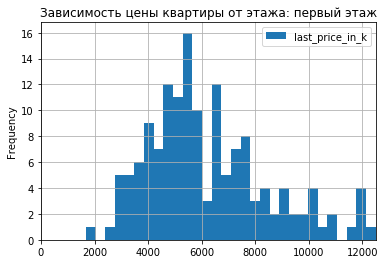

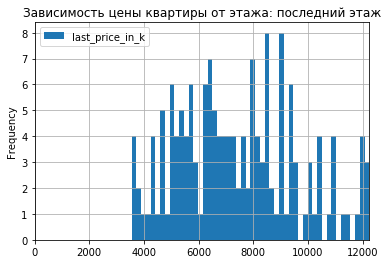

In [60]:
# Зависимость цены квартиры от этажа
make_first_last_hist(realty_in_petersburg_center)

Тренд на зависимость цены от площади квартиры сохраняется, так же как и от количества комнат. Однако, в центре Петербурга дороже стоят квартиры на последнем этаже, тогда как по всему датафрейму различий не наблюдается. Расстояние до центра никак не влияет на цену квартиры - стоимости распределены по всему исследуемому району.

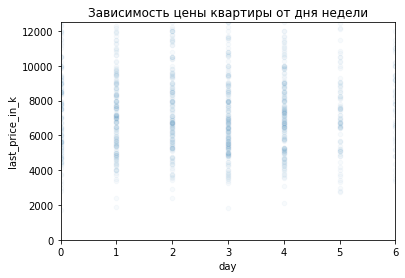

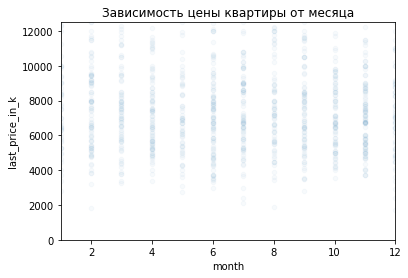

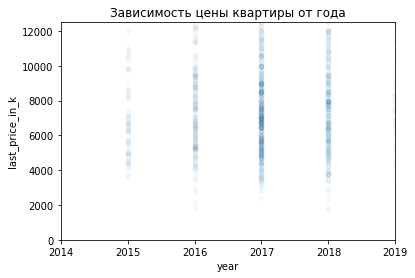

In [61]:
draw_dmy(realty_in_petersburg_center)

In [62]:
realty_in_petersburg_center[['last_price_in_k', 'day', 'month', 'year']].corr().head(1)

,last_price_in_k,day,month,year
last_price_in_k,1.0,0.002986,-0.03035,0.046893


Зависимость стоимости квартиры от даты публикации объявления так же, как и по всему датафрейму, не наблюдается.

### Выводы
По полученным данным следует, что наибольшая площадь квартиры состпвляет 900 кв. м., стоимость - 763000000 руб., число комнат - 19, высота потолков - 100 м. Очевидно, что значение высоты полотков 100 м - аномальное, его можно при анализе не учитывать.

Минимальные значения составляют - 12 кв. м для площади квартиры, 12190 руб. - стоимость, 0 - число комнат, 1 м - высота потолков. Здесь высота потолков также аномальна.

Исходя из гистограмм - наиболее часто вречающиеся площади квартир находятся в диапазонах 30-50 кв.м и 60-70 кв.м. Упоминания квартир с
По полученным данным следует, что наибольшая площадь квартиры состпвляет 900 кв. м., стоимость - 763000000 руб., число комнат - 19, высота потолков - 100 м. Очевидно, что такие значения - выбросы.

Минимальные значения составляют - 12 кв. м для площади квартиры, 12190 руб. - стоимость, 0 - число комнат, 1 м - высота потолков. Здесь высота потолков также аномальна.

Данные были очищены от выбросов, был сформирован срез с "чистыми данными". По этим данным были построены гистограммы.

Исходя из гистограмм - наиболее часто вречающиеся площади квартир находятся в диапазонах 30-38 и 40-45 кв.м. Упоминания квартир с площадью выше 100 кв.м. и ниже 28 кв.м. единичны.

Количество квартир после 10 млн стремится к нулю. Пик квартир приходится на диапазон от 3,7 млн.

Наибольшее количество квартир - 1- и 2-х комнатные, при этом однокомнатных наибольшее количество, затем 3-х комнатных, меньше двушкомнатных. Количество квартир от 4-х комнат и более заметно снижается, по сранению с другими. Квартиры, с количеством комнат больше 5 - редкость.

Пик высоты потолков приходится на 2,75 м. Примерно на треть меньше квартир с потолком 2,5 м.

- Среднее время продажи квартиры: 154.28
- Медиана времени продажи квартиры: 88.00

Исходя из проведенного анализа, сделку можно считать долгой (в пределах нормы), если квартира продается дольше 300 дней.

Сделки, состоявшиеся в первые 3 дня, можно считать быстрыми.

После 3-х дней продажи квартиры снижаются, однако отмечаются всплески продаж. Пик приходится примерно на 45 день продаж, затем продажипадают. Пик меньше находится примерно к концу второго месяца продаж, затем активность падает, с небольшими пиками примерно каждые 30 дней.

Цена квартиры зависит от __площади квартиры__ - чем больше площадь - тем выше стоимость. Имеются некоторые аномалии в виде высокой стоимости квартиры с маленькой площадью, но в целом тренд прослеживается.

Также, чем больше __комнат__, тем выше цена квартиры. Можно отметить, что четко видны границы изменения стоимости в зависимости от количества комнат.

Расположение квартиры на __первом или последнем этаже__ практически не влияет на стоимость. Судя по графикам, она примерно одинакова.

Больше всего квартир продаются в пределах 10-20 км от __центра города__, при этом, чем ближе к центру, тем стоимость выше. Стоит отметить, что зависимость не такая явная, возможно, влияет более плохое состояние квартир в центре.
Цена квартиры зависит от __площади квартиры__ - чем больше площадь - тем выше стоимость. Имеются некоторые аномалии в виде высокой стоимости квартиры с маленькой площадью, но в целом тренд прослеживается.

Также, чем больше __комнат__, тем выше цена квартиры. Можно отметить, что четко видны границы изменения стоимости в зависимости от количества комнат.

Расположение квартиры на __первом или последнем этаже__ практически не влияет на стоимость. Судя по графикам, она примерно одинакова.

Больше всего квартир продаются в пределах 10-20 км от __центра города__, при этом, стоимость в этом отрезке примерно равнораспределена. Прослеживается тренд - чем ближе к центру (в пределах 10 км) - тем квартира дороже. Стоит отметить, что зависимость не такая явная, возможно, влияет более плохое состояние квартир в центре.

Стоимость квартиры не зависит ни от дня, ни от месяца размещения объявления. Стоит отметить, что наблюдается рост стоимости квартир с 2015 до 2018 годов. В 2014 году объявлений о продаже квартир мало, скорее всего повлиял кризис. С 2015 года количество объявлений растет, растет и стоимость квартир. К 2019 году стоимость заметно снизилась, по сравнению с 2018 годом.


В центре Петербурга преобладают квартиры площадью от 40 до 50 кв.м., имеются пики на 60 кв.м и примерно равный ему на 84 кв.м, в отличие от данных всего датафрейма, где чаще всего встречаются квартиры с площадью 30-45 кв.м Стоимость квартир чаще находится в диапазоне 5 до 7 млн. руб., тогда как в целом по всем квартирам - большинство продается по цене 3,7 млн. Чаще всего продают 2-х и 3-х комнатные квартиры. По всему датафрейму - 1 и 2-х комнатные. Высота потолков в целом не отличается от данных по всему датафрейму, отсутствует пик на 2,5 м.

Тренд на зависимость цены от площади квартиры сохраняется, так же как и от количества комнат. Однако, в центре Петербурга дороже стоят квартиры на последнем этаже, тогда как по всему датафрейму различий не наблюдается.

Зависимость стоимости квартиры от даты публикации объявления так же, как и по всему датафрейму, не наблюдается.

### Шаг 5. Общий вывод

Стоимость квартиры зависит от площади, количества комнат, удаленности от центра города. Расположение квартиры на первом или последнем этаже в целом не влияет на стоимость, однако это может отличаться от района к району. К примеру, в центре Петербурга дороже стоят квартиры на последнем этаже, возможно из соображений безопасности, меньшего количества шума и выхлопных газов, наличия мансард и т.п. Также площадь предлагаемых квартир может отличаться в зависимости от местонахождения квартиры.